<a href="https://colab.research.google.com/github/NehaKumari500092077/Machine-Learning-Lab/blob/main/Session_9_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Assignment 9**: Random Forest Regression

Objective: This assignment provides a hands-on understanding of the Random Forest Regression algorithm. You will implement the algorithm from scratch and compare its performance with the scikit-learn implementation. You will also tune hyperparameters using cross-validation.

Dataset:  Diabetes dataset (https://scikit-learn.org/1.5/modules/generated/sklearn.datasets.load_diabetes.html#sklearn.datasets.load_diabetes)

Tasks:








1. Data Preparation: [1 Marks]
*   Load the diabetes dataset using sklearn.datasets.load_diabetes.
*   Split the dataset into training and test sets with a 80%-20% ratio.

In [3]:
from sklearn.datasets import load_diabetes
import pandas as pd
import numpy as np


diabetes_data = load_diabetes()
X = diabetes_data.data
Y = diabetes_data.target
dataset = pd.DataFrame(data=np.c_[X, Y], columns=diabetes_data.feature_names + ['target'])
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB
None


In [69]:
print(dataset.head())

        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  target  
0 -0.002592  0.019907 -0.017646   151.0  
1 -0.039493 -0.068332 -0.092204    75.0  
2 -0.002592  0.002861 -0.025930   141.0  
3  0.034309  0.022688 -0.009362   206.0  
4 -0.002592 -0.031988 -0.046641   135.0  


In [70]:
# check for duplicates
duplicates_value = dataset.duplicated().sum()
print(f'No. of Duplicates: {duplicates_value}')

No. of Duplicates: 0


In [71]:
# check for missing values
missing_value = dataset.isnull().sum()
print(f'Total Number of Missing Values: {missing_value.sum()}')

Total Number of Missing Values: 0


In [4]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
dataset = sc.fit_transform(dataset)

# convert scaled data back to dataframe
dataset = pd.DataFrame(dataset, columns=diabetes_data.feature_names + ['target'])

In [5]:
# Split dataset into traing and test set
from sklearn.model_selection import train_test_split

X = dataset.drop(columns='target')
Y = dataset['target']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

# Convert to NumPy arrays
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
Y_train = Y_train.to_numpy()
Y_test = Y_test.to_numpy()


2. From-Scratch Implementation: [7 Marks]
* Implement the Random Forest Regression algorithm from scratch in Python.

In [21]:
class DecisionTreeRegressionScratch:

  def __init__(self, max_depth=5, max_features='sqrt'):
    self.max_depth = max_depth # Maximum depth of the tree
    self.max_features = max_features # Number of features to consider for each split




  def fit(self, X, Y):
    self.no_of_features = X.shape[1] # Number of features in the dataset
    if(self.max_features == 'sqrt'):
      self.max_features = int(np.sqrt(self.no_of_features)) # Calculate the number of features to use
    self.tree_ = self._build_tree(X, Y)  # Build the tree




  def _build_tree(self, X, Y, depth = 0):
    no_of_samples, no_of_features = X.shape # Get the number of samples and features
    if(depth >= self.max_depth or no_of_samples < 2): # Stopping criteria: Maximum depth reached, Not enough samples to split
      if len(Y) == 0:
        return 0
      else:
        return np.mean(Y) # Return the mean of the target values

    # Select random subset of features
    feature_indices = np.random.choice(no_of_features, size=self.max_features, replace=False)

    # Select best split from random subset
    best_mean_squared_error = float('inf')
    best_feature_index = None
    best_threshold = None

    for index in feature_indices: # Iterate through selected feature
      sorted_indices = np.argsort(X[:, index])  # Get indices that would sort the feature values
      thresholds = X[sorted_indices, index]  # Sort the thresholds
      values = Y[sorted_indices]  # Sort the corresponding target values

      for i in range(1, no_of_samples):
         if(values[i - 1] != values[i]): # Check if the values changes between consecutive samples
          thr = (thresholds[i - 1] + thresholds[i]) / 2
          left = [Y[j] for j in range(no_of_samples) if X[j, index] < thr] # Samples in the left child
          right = [Y[j] for j in range(no_of_samples) if X[j, index] >= thr] # Samples in the right child
          # Handle empty or single-element arrays
          var_left = np.var(left) if len(left) > 1 else 0
          var_right = np.var(right) if len(right) > 1 else 0

          # Check for zero division
          if no_of_samples > 0:
            mean_square_error = ((len(left) * var_left) + (len(right) * var_right)) / no_of_samples
          #else:
           # mean_square_error = 0


          if mean_square_error < best_mean_squared_error: # Check if this split is better
            best_mean_squared_error = mean_square_error
            best_feature_index = index
            best_threshold = thr

    if best_feature_index is None:
      return np.mean(Y)  # Fallback if no split is found

    if(best_mean_squared_error == float('inf')): # If no split found
      return np.mean(Y) # Return mean as leaf value



    # Recur to build the left and right subtrees
    left_indexes = np.where(X[:, best_feature_index] < best_threshold) # Indices of samples in the left child
    right_indexes = np.where(X[:, best_feature_index] >= best_threshold) # Indices of samples in the right child
    left = self._build_tree(X[left_indexes], Y[left_indexes], depth + 1) # Recursively build left subtree
    right = self._build_tree(X[right_indexes], Y[right_indexes], depth + 1) # Recursively build right subtree
    return (best_feature_index, best_threshold, left, right) # Return the node (feature index, threshold, left child, right child)



  def predict(self, X): # predicts the class labels for a given feature matrix X
        return [self._predict(inputs) for inputs in X] # Predict for each sample in X



  def _predict(self, inputs): # traverses the tree to make a prediction for a single sample.
    node = self.tree_ # Start at the root node
    while isinstance(node, tuple):
      index, thr, left, right = node
      if inputs[index] < thr:
        node = left
      else:
        node = right
    return node  # Return the mean value at the leaf node



class RandomForestRegressionScratch:

  def __init__(self, n_estimators=100, max_depth=5, max_features='sqrt'):
    self.no_of_trees = n_estimators # Number of trees in the forest
    self.max_depth = max_depth # Maximum depth of each tree
    self.max_features = max_features # Number of features to consider for each split

  def fit(self, X, Y):
    self.trees = []  # List to store the decision trees
    self.indices = [] # List to store the indices used for bootstrapping
    no_of_samples = X.shape[0] # Number of samples
    for _ in range(self.no_of_trees): # Iterate to create no_of_trees
      tree = DecisionTreeRegressionScratch(max_depth=self.max_depth, max_features=self.max_features) # Create a DecisionTree
      indices = np.random.choice(no_of_samples, size=no_of_samples, replace=True) # Bootstrap samples
      tree.fit(X[indices], Y[indices]) # Train the tree on bootstrapped samples; For each tree, it generates a bootstrap sample (random sampling with replacement)
      self.trees.append(tree) # Add the trained tree to the list
      self.indices.append(indices) # Store the indices used for bootstrapping

  def predict(self, X):
    # Get predictions from each tree and return their mean
    predictions = np.array([tree.predict(X) for tree in self.trees]) # Get predictions from each tree
    return np.mean(predictions, axis=0) # Return the mean of the predictions

  # Implementing get_params and set_params
  def get_params(self, deep=True):
        return {"n_estimators": self.no_of_trees, "max_depth": self.max_depth}

  def set_params(self, **params):
        for key, value in params.items():
            setattr(self, key, value)
        return self



def calculate_oob_error(X, y, forest):
    no_of_samples = X.shape[0] # Number of samples
    no_of_trees = forest.no_of_trees # Number of trees
    predictions = np.zeros((no_of_samples, no_of_trees)) # Array to store OOB predictions


    for i, tree in enumerate(forest.trees): # Iterate over trees
        indices = forest.indices[i] # Indices used to train the current tree
        oob_indices = np.array([index for index in range(no_of_samples) if index not in indices]) # Out-of-bag indices
        if len(oob_indices) > 0: # If there are OOB samples
          predictions[oob_indices, i] = tree.predict(X[oob_indices]) # Predict for OOB samples


    # Calculate the mean prediction for each sample
    oob_predictions = np.mean(predictions, axis=1) # Average predictions along the tree axis

    # Calculate Mean Squared Error (MSE) only for samples with predictions
    valid_indices = ~np.isnan(oob_predictions)  # Find indices where predictions are valid
    oob_err = np.mean((y[valid_indices] - oob_predictions[valid_indices]) ** 2) if np.any(valid_indices) else None

    return oob_err  # Return the mean squared error as the OOB error


In [27]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Create and train Random Forest with feature randomness
rf = RandomForestRegressionScratch(n_estimators=100, max_depth=5, max_features='sqrt')
rf.fit(X_train, Y_train)

# Calculate out-of-bag error
scratch_oob_mse = calculate_oob_error(X_train, Y_train, rf)
print("Out-of-Bag Mean Squared Error by scratch implementation: ", scratch_oob_mse)

# Predict on the test set
Y_pred_scratch = rf.predict(X_test)

# Calculate regression metrics
scratch_mse = mean_squared_error(Y_test, Y_pred_scratch)  # Mean Squared Error
print("Mean Squared Error by scratch implementation:", scratch_mse)


Out-of-Bag Mean Squared Error by scratch implementation:  0.757644964285694
Mean Squared Error by scratch implementation: 0.47572859341601115


In [28]:
import matplotlib.pyplot as plt

# Define a function to plot a decision tree in a regression context
def plot_regression_tree(tree, feature_names, depth=0):

    if isinstance(tree, tuple):
        idx, thr, left, right = tree
        feature_name = feature_names[idx]
        # Print the condition at the decision node
        print('  ' * depth + f'if {feature_name} <= {thr:.2f}:')
        plot_regression_tree(left, feature_names, depth + 1)
        print('  ' * depth + f'else:')
        plot_regression_tree(right, feature_names, depth + 1)
    else:
        # Leaf node: display the predicted average value for regression
        print('  ' * depth + f'Predicted value: {tree:.2f}')

# Create a list of feature names for visualization
feature_names = [f'Feature {i}' for i in range(X_train.shape[1])]

# Select a few decision trees for visualization
trees_to_visualize = [0, 1, 2, 3, 4]  # Adjust the number of trees you want to visualize

# Visualize each selected decision tree
for i in trees_to_visualize:
    print(f"\nDecision Tree {i+1}:")
    plot_regression_tree(rf.trees[i].tree_, feature_names)
    print()



Decision Tree 1:
if Feature 2 <= 0.11:
  if Feature 6 <= -0.72:
    if Feature 3 <= -0.81:
      if Feature 4 <= -1.02:
        Predicted value: -1.26
      else:
        if Feature 0 <= -1.26:
          Predicted value: 0.13
        else:
          Predicted value: -0.39
    else:
      if Feature 4 <= 0.66:
        if Feature 8 <= 0.42:
          Predicted value: -0.10
        else:
          Predicted value: 0.63
      else:
        if Feature 8 <= 2.52:
          Predicted value: 1.38
        else:
          Predicted value: -0.00
  else:
    if Feature 8 <= 0.53:
      if Feature 0 <= 0.07:
        if Feature 4 <= 0.81:
          Predicted value: -0.89
        else:
          Predicted value: 0.62
      else:
        if Feature 3 <= 0.97:
          Predicted value: -0.56
        else:
          Predicted value: 0.01
    else:
      if Feature 9 <= -0.72:
        if Feature 7 <= -0.52:
          Predicted value: -0.24
        else:
          Predicted value: -0.96
      else:
    

3. Hyperparameter Tuning (From-Scratch Implementation): [5 Marks]
* Use GridSearchCV from scikit-learn to find the optimal number of trees for your from-scratch implementation.
* Evaluate the model with the best number of trees on the test set and report the Mean Squared Error (MSE) and the OOB error.


In [32]:
from sklearn.model_selection import GridSearchCV

# Create a parameter grid for your from-scratch implementation
param_grid = {'n_estimators': [10, 50, 100, 200, 300]}

# Set up GridSearchCV for the scratch implementation
scratch_rf = RandomForestRegressionScratch(max_depth=5, max_features='sqrt')
grid_search = GridSearchCV(estimator=scratch_rf, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)

# Fit the model
grid_search.fit(X_train, Y_train)


# Get the best number of trees
best_no_of_tree_scratch = grid_search.best_params_['n_estimators']
print(f"Optimal number of trees (from-scratch): {best_no_of_tree_scratch}")

# Evaluate the model with the best parameters
best_rf = RandomForestRegressionScratch(n_estimators=best_no_of_tree_scratch, max_depth=5, max_features='sqrt')
best_rf.fit(X_train, Y_train)

# Calculate out-of-bag error
oob_mse = calculate_oob_error(X_train, Y_train, best_rf)
print("Out-of-Bag error: ", oob_mse)

Y_pred = best_rf.predict(X_test)
best_mse = mean_squared_error(Y_test, Y_pred)
print(f"Mean Squared Error with optimal trees (from-scratch): {best_mse}")


Optimal number of trees (from-scratch): 300
Out-of-Bag error:  0.7708251698116277
Mean Squared Error with optimal trees (from-scratch): 0.47782773827752


5. Scikit-learn Implementation: [5 Marks]
* Use RandomForestRegressor from scikit-learn to train a model on the diabetes dataset.
* Using cross-validation find the optimal number of trees for the scikit-learn implementation.
* Evaluate the model with the best number of trees on the test set and report the MSE and OOB.


In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.tree import plot_tree

# Create and train Random Forest with feature randomness
rf = RandomForestRegressor(n_estimators=100, max_depth=5, max_features='sqrt', random_state=42, oob_score=True)
rf.fit(X_train, Y_train)

# Calculate out-of-bag Mean Squared Error
sklearn_oob_mse = mean_squared_error(Y_train, rf.oob_prediction_)
print("Out-of-Bag Mean Squared Error by sklearn implementation:", sklearn_oob_mse)

# Predict on the test set
Y_pred_sklearn = rf.predict(X_test)

# Calculate Mean Squared Error
sklearn_mse = mean_squared_error(Y_test, Y_pred_sklearn)
print("Mean Squared Error by sklearn implementation:", sklearn_mse)



Out-of-Bag Mean Squared Error by sklearn implementation: 0.5549245369998331
Mean Squared Error by sklearn implementation: 0.47521187265748593


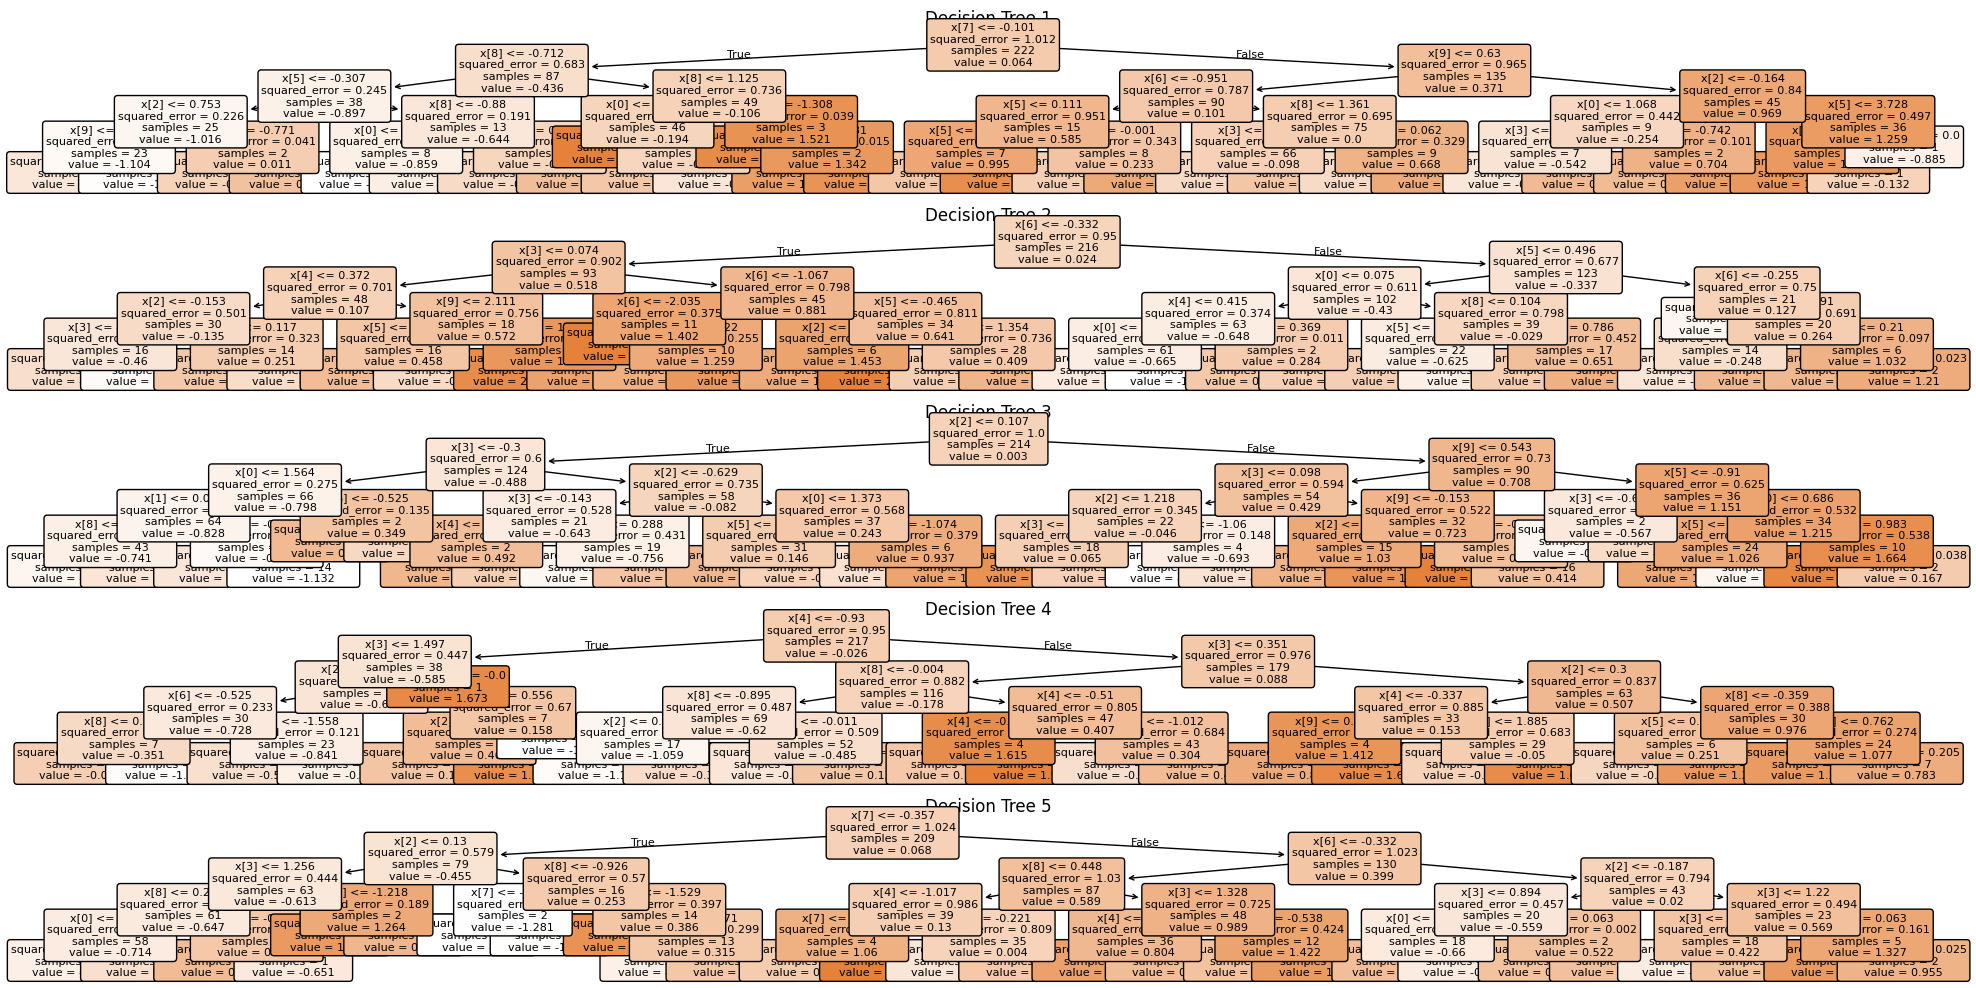

In [24]:
# Plot decision trees properly one below the other
# Limit the number of trees to plot (e.g., first 5 trees)
num_trees_to_plot = min(5, len(rf.estimators_))  # Adjust the number of trees here
fig, axes = plt.subplots(num_trees_to_plot, 1, figsize=(20, 2 * num_trees_to_plot))

# Plot each tree in the Random Forest
for i, estimator in enumerate(rf.estimators_[:num_trees_to_plot]):
    plot_tree(estimator, ax=axes[i], filled=True, rounded=True, fontsize=8)  # Adjust fontsize for readability
    axes[i].set_title('Decision Tree {}'.format(i + 1))

plt.tight_layout()
plt.show()


In [25]:
# Create a parameter grid for your from-scratch implementation
param_grid = {'n_estimators': [10, 50, 100, 200, 300]}

# Set up GridSearchCV for the scratch implementation
sklearn_rf = RandomForestRegressor(max_depth=5, max_features='sqrt', random_state=42, oob_score=True)
grid_search = GridSearchCV(estimator=sklearn_rf, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)

# Fit the model
grid_search.fit(X_train, Y_train)


# Get the best number of trees
best_no_of_tree_sklearn = grid_search.best_params_['n_estimators']
print(f"Optimal number of trees (from-scratch): {best_no_of_tree_sklearn}")

# Evaluate the model with the best parameters
best_rf = RandomForestRegressor(n_estimators=best_no_of_tree_sklearn, max_depth=5, max_features='sqrt', random_state=42, oob_score=True)
best_rf.fit(X_train, Y_train)

# Calculate out-of-bag error
oob_mse = mean_squared_error(Y_train, best_rf.oob_prediction_)
print("Out-of-Bag error: ", oob_mse)


Y_pred = best_rf.predict(X_test)
best_mse = mean_squared_error(Y_test, Y_pred)
print(f"Mean Squared Error with optimal trees (from-scratch): {best_mse}")

Optimal number of trees (from-scratch): 200
Out-of-Bag error:  0.553483349382653
Mean Squared Error with optimal trees (from-scratch): 0.4767931272317942



6. Comparison and Visualization: [2 Marks]
* Compare the performance (MSE) of your from-scratch implementation with the scikit-learn implementation.
* Create scatter plots to visualize:
  * Predicted values vs. true values for your from-scratch implementation.
  * Predicted values vs. true values for the scikit-learn implementation.
* Display these plots side-by-side for easy comparison.

In [37]:
print(f"Optimal number of trees (from-scratch): {best_no_of_tree_scratch}")
print(f"Optimal number of trees (from-sklearn): {best_no_of_tree_sklearn}")

# Compare the performance (MSE) of your from-scratch implementation with the scikit-learn implementation.
print("\nOut-of-Bag Mean Squared Error by sklearn implementation:", sklearn_oob_mse)
print("Out-of-Bag Mean Squared Error by scratch implementation: ", scratch_oob_mse)

print("\n Mean Squared Error by sklearn implementation:", sklearn_mse)
print("Mean Squared Error by scratch implementation:", scratch_mse)



Optimal number of trees (from-scratch): 300
Optimal number of trees (from-sklearn): 200

Out-of-Bag Mean Squared Error by sklearn implementation: 0.5549245369998331
Out-of-Bag Mean Squared Error by scratch implementation:  0.757644964285694

 Mean Squared Error by sklearn implementation: 0.47521187265748593
Mean Squared Error by scratch implementation: 0.47572859341601115


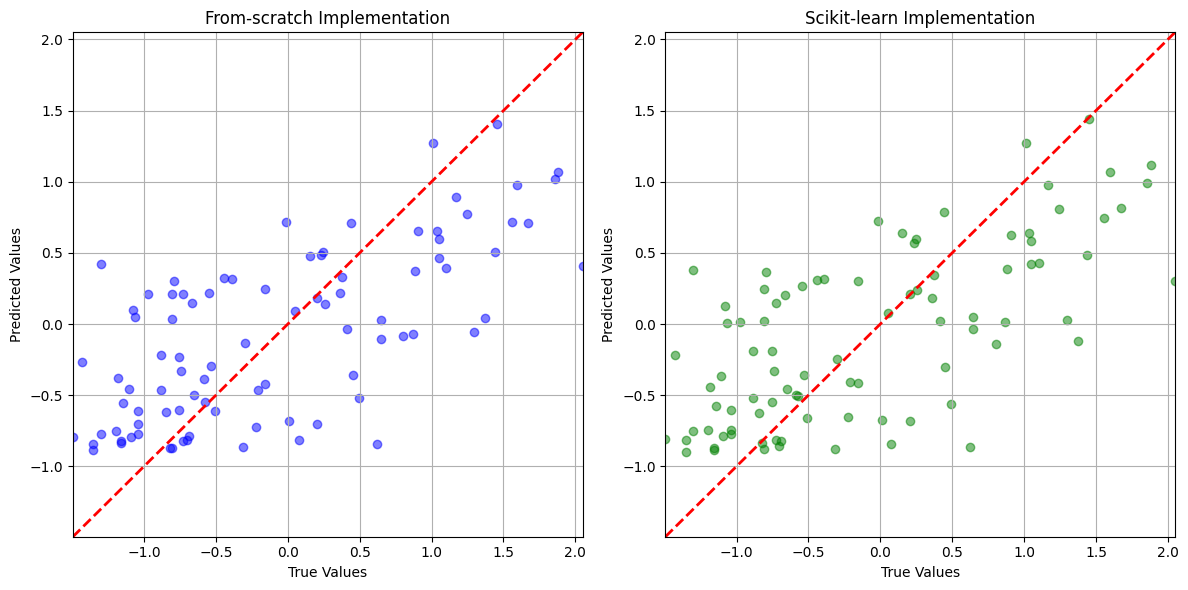

In [30]:
# Create scatter plots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Scatter plot for from-scratch implementation
axes[0].scatter(Y_test, Y_pred_scratch, color='blue', alpha=0.5)
axes[0].plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'r--', lw=2)  # Ideal line for perfect predictions
axes[0].set_title('From-scratch Implementation')
axes[0].set_xlabel('True Values')
axes[0].set_ylabel('Predicted Values')
axes[0].set_xlim([Y_test.min(), Y_test.max()])
axes[0].set_ylim([Y_test.min(), Y_test.max()])
axes[0].grid(True)

# Scatter plot for scikit-learn implementation
axes[1].scatter(Y_test, Y_pred_sklearn, color='green', alpha=0.5)
axes[1].plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'r--', lw=2)  # Ideal line for perfect predictions
axes[1].set_title('Scikit-learn Implementation')
axes[1].set_xlabel('True Values')
axes[1].set_ylabel('Predicted Values')
axes[1].set_xlim([Y_test.min(), Y_test.max()])
axes[1].set_ylim([Y_test.min(), Y_test.max()])
axes[1].grid(True)

plt.tight_layout()
plt.show()


In [34]:
from sklearn.model_selection import KFold

def cross_validate_params(no_of_tree, features, target, k_folds=5):
    kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)
    mse_scores = []

    for train_index, val_index in kf.split(features):
        X_train, X_val = features[train_index], features[val_index]
        y_train, y_val = target[train_index], target[val_index]

        # Initialize the CART tree with the given depth
        model = RandomForestRegressionScratch(n_estimators=no_of_tree, max_depth=5, max_features='sqrt')
        model.fit(X_train, Y_train)
        predictions = model.predict(X_val)

        # Compute MSE
        mse = mean_squared_error(y_val, predictions)
        mse_scores.append(mse)

    return np.mean(mse_scores)

In [35]:
import numpy as np


# Define the parameter grid
no_of_trees = [10, 50, 100, 200, 300]
results = []

for tree in no_of_trees:
  mse = cross_validate_params(tree, X_train, Y_train)
  results.append(mse)

print("Results: ", results)
print("Cross-Validation Results:")
min_mse_index = np.argmin(results)

# Optionally, find the best combination
print(f"Best parameters: no_of_trees {no_of_trees.get(min_mse_index)} with MSE = {results.get(min_mse_index)}")


AttributeError: 'RandomForestRegressionScratch' object has no attribute 'mse_loss'